In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
def getXy(standard =True):
    data = pd.read_csv("data_voiture_clean.csv")
    for col in ["model","transmission","fuelType"]:
        data = pd.get_dummies(data,columns=[col],drop_first=True )     
    X = data.drop(columns=["marque","price"]).values.reshape(-1,205)
    y = data["price"].values
    Xtrain,Xtest, ytrain,ytest = train_test_split(X,y, random_state = 42, test_size = 0.30)
    return Xtrain, Xtest, ytrain,ytest
Xtrain, Xtest,ytrain,ytest = getXy()
reg.fit(Xtrain,ytrain)
reg.score(Xtest,ytest)


0.8788266516444333

In [2]:
# Infos moyen d'age des véhicules
dataBis = pd.read_csv("data_voiture_clean.csv")
def aff_Min_Moy_Max(col):
    print("La colonne :",col)
    print("MIN :",dataBis[col].min(),"\nMOY :",dataBis[col].mean(),"\nMAX :",dataBis[col].max())
aff_Min_Moy_Max("year")    

La colonne : year
MIN : 1970 
MOY : 2017.0867806934386 
MAX : 2020


In [3]:
print(dataBis["year"].min())

1970


## IsolationForest pour detecter les outlier. 

(1967.5, 2022.5, -25984.300000000003, 545692.3)

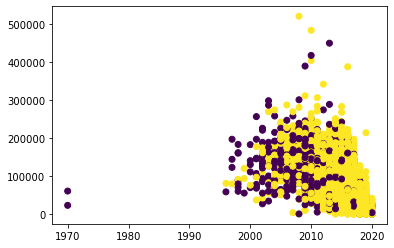

In [4]:


import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination = 0.1, random_state=3, n_estimators=100).fit(Xtrain)
# clf.predict(Xtrain)
clf.fit_predict(Xtrain)
plt.scatter(Xtrain[:,0],Xtrain[:,1], c = clf.fit_predict(Xtrain))
# axes= plt.gca()
# print(axes.set_xlim(0,4))
plt.axis()



In [5]:
#verif sur les prix négatif
dataBis.loc[dataBis["price"]<=0].value_counts()

Series([], dtype: int64)

In [6]:
# dataBis.loc[dataBis["year"]<1997].value_counts()

### Regression Lasso

In [7]:
from sklearn.linear_model import Lasso
regLasso = Lasso(alpha=0.1,max_iter=5000)
### entrainement du model
regLasso.fit(Xtrain,ytrain)
### resultat du model
regLasso.score(Xtest,ytest)

0.8787940064654858

In [8]:
regLasso.predict(Xtest)


array([ 29291.03670696,   -463.2838703 , -10287.69166537, ...,
        13179.2334389 ,   8534.94368115,  16193.54363632])

In [9]:
ytest

array([33813,  5610,  1983, ..., 16027,  6669, 16965], dtype=int64)

In [10]:
from sklearn.model_selection import GridSearchCV
# lasso_params = {'alpha':[0.01, 0.05, 0.1, 0.15, 0.20]}
# 0.8788319872821607
# lasso_params = {'alpha':[0.005, 0.01, 0.015, 0.02, 0.025]}
# 0.8788348885954073
# lasso_params = {'alpha':[0.025,0.030,0.035]}
# 0.8788348885954073
lasso_params = {'alpha':[0.026]}
regLasso2 =  GridSearchCV(regLasso, param_grid=lasso_params).fit(Xtrain, ytrain)
# regLasso2.best_estimator_   ==> permet d'avoir le "meilleur" alpha.
# regLasso2.best_estimator_  


# regLasso2.score(Xtest,ytest)

In [11]:
regLasso2.score(Xtest,ytest)

0.8788349148502428